In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [2]:
# Initial Scrape

url = 'https://nba2kw.com/list/nba-2k-ratings-top-100-players/'
req = requests.get(url)

data = req.text
soup = BeautifulSoup(req.content, 'lxml')

In [3]:
# Create and inspect DataFrame

table = soup.find_all('table')
rank = pd.read_html(str(table))[0]

display(rank)

,Rank,Player,Team,Pos.,OVR,Height,Build
0,1,LeBron James,Lakers,SF,97,"6'9""",2-Way Slashing Playmaker
1,2,Steph Curry,Warriors,PG,96,"6'3""",Offensive Threat
2,3,Kawhi Leonard,Clippers,SF,96,"6'7""",2-Way Scoring Machine
3,4,Giannis Antetokounmpo,Bucks,PF,96,"6'11""",2-Way Slashing Playmaker
4,5,Kevin Durant,Nets,SF,96,6'10,2-Way Scoring Machine
...,...,...,...,...,...,...,...
95,96,Steven Adams,Pelicans,C,80,"6'11""",Paint Beast
96,97,Enes Kanter,Celtics,C,80,"6'10""",Glass-Cleaning Finisher
97,98,Thaddeus Young,Bulls,PF,80,"6'8""",Inside-Out Scorer
98,99,Kyle Anderson,Grizzlies,SF,80,"6'9""",Mid-Range Shot Creator


In [4]:
# Set Rank as index

rank.set_index('Rank', inplace=True)

display(rank)

,Player,Team,Pos.,OVR,Height,Build
Rank,,,,,,
1,LeBron James,Lakers,SF,97,"6'9""",2-Way Slashing Playmaker
2,Steph Curry,Warriors,PG,96,"6'3""",Offensive Threat
3,Kawhi Leonard,Clippers,SF,96,"6'7""",2-Way Scoring Machine
4,Giannis Antetokounmpo,Bucks,PF,96,"6'11""",2-Way Slashing Playmaker
5,Kevin Durant,Nets,SF,96,6'10,2-Way Scoring Machine
...,...,...,...,...,...,...
96,Steven Adams,Pelicans,C,80,"6'11""",Paint Beast
97,Enes Kanter,Celtics,C,80,"6'10""",Glass-Cleaning Finisher
98,Thaddeus Young,Bulls,PF,80,"6'8""",Inside-Out Scorer


In [5]:
# Teams with the most players in the NBA 2k21 Top 100

rank['Team'].value_counts().head()

Nets         7
Pacers       5
Grizzlies    5
Nuggets      5
Clippers     5
Name: Team, dtype: int64

In [6]:
# Most common player build

rank['Build'].value_counts().idxmax()

'Inside-Out Scorer'

(85.0, 100.0)

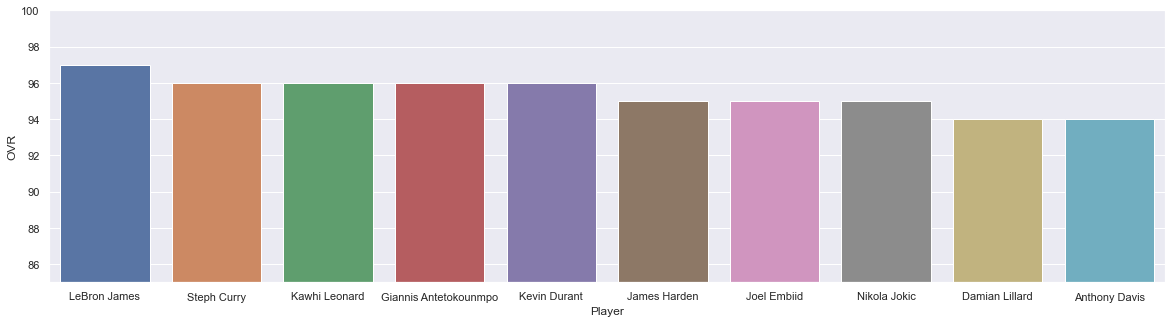

In [7]:
# Plotting the Top 10 rated players

top10 = rank.head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=top10, x='Player', y='OVR')
plt.ylim(85,100)